In [2]:
df_h.columns

Index(['#year', 'facility', 'accountNumber', 'FICO', 'BKRPT', 'recordCount',
       'defaultCount', 'defaultDate', 'defaultBalance', 'cureDate', 'origFICO',
       'origBKRPT', 'faceAmountOfNote', 'vintage', 'origLTV', 'origDTI',
       'origCollateralValue', 'collateralCode', 'productCode', 'ID',
       'enteredDate', 'age', 'lienPosition', 'Customer Balance'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

df_h = pd.read_csv('/project_data/data_asset/Sample Heloc Data Dummy Values.csv')
df_h.head()

,#year,facility,accountNumber,FICO,BKRPT,recordCount,defaultCount,defaultDate,defaultBalance,cureDate,...,origLTV,origDTI,origCollateralValue,collateralCode,productCode,ID,enteredDate,age,lienPosition,Customer Balance
0,2017,HOF,1,839.0,973.0,1,0,NaN,0,NaN,...,21.1,50.1,10000,OO01,595,1,3/1/2000,1.2,1,101.1
1,2017,HOS,2,683.0,483.0,1,0,NaN,0,NaN,...,40.0,60.2,12000,OO02,595,2,4/1/2012,2.0,2,201.1
2,2017,HOF,3,775.0,837.0,1,0,NaN,0,NaN,...,12.1,70.3,11000,OO01,595,3,2/1/2010,3.2,1,302.2
3,2018,HOF,4,NaN,973.0,1,0,NaN,0,NaN,...,22.2,50.1,10000,OO01,595,4,3/1/2000,3.2,1,95.1
4,2018,HOS,5,695.0,483.0,1,0,NaN,0,NaN,...,17.9,60.2,12000,OO02,595,5,4/1/2012,4.0,2,75.5


In [8]:
df_h['caPerformanceFlag'] = np.where(pd.isnull(df_h.defaultDate), 0, 1)

In [9]:
df_h

,#year,facility,accountNumber,FICO,BKRPT,recordCount,defaultCount,defaultDate,defaultBalance,cureDate,...,origDTI,origCollateralValue,collateralCode,productCode,ID,enteredDate,age,lienPosition,Customer Balance,caPerformanceFlag
0,2017,HOF,1,839.0,973.0,1,0,NaN,0,NaN,...,50.1,10000,OO01,595,1,3/1/2000,1.2,1,101.1,0
1,2017,HOS,2,683.0,483.0,1,0,NaN,0,NaN,...,60.2,12000,OO02,595,2,4/1/2012,2.0,2,201.1,0
2,2017,HOF,3,775.0,837.0,1,0,NaN,0,NaN,...,70.3,11000,OO01,595,3,2/1/2010,3.2,1,302.2,0
3,2018,HOF,4,NaN,973.0,1,0,NaN,0,NaN,...,50.1,10000,OO01,595,4,3/1/2000,3.2,1,95.1,0
4,2018,HOS,5,695.0,483.0,1,0,NaN,0,NaN,...,60.2,12000,OO02,595,5,4/1/2012,4.0,2,75.5,0
5,2018,HOF,6,751.0,NaN,1,0,NaN,0,NaN,...,70.3,11000,OO01,595,6,2/1/2010,1.8,1,50.2,0


In [185]:
df = pd.read_csv('/project_data/data_asset/Test_fields_100821_results.csv')
df.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES
0,0,0,5,0,480,1st,35,6.360000,1.272000,100000020,RUN,2,0,N,0.989181,0.010819,N,0.562406,0.437594
1,0,0,9,-7,1050,1st,45,4.756098,0.528455,100000054,RUN,5,4,N,0.999278,0.000722,Y,0.439296,0.560704
2,0,2,4,7,600,3rd,5,8.164835,2.041209,200000049,PASS,4,9,N,0.929720,0.070280,Y,0.391968,0.608032
3,0,0,11,7,180,1st,45,6.216667,0.565152,200000041,PASS,4,1,N,0.999941,0.000059,N,0.676803,0.323197
4,0,0,1,0,60,1st,45,13.416667,13.416667,200000085,PASS,8,5,N,0.800383,0.199617,N,0.608495,0.391505


In [174]:
df.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME',
       'TRUEFIELD', 'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'PLAYIDSTR',
       'RUN_PASS', 'CONCEPT_8', 'CONCEPT_9', 'pred_TD', 'prob_TD_NO',
       'prob_TD_YES', 'pred_FIRST', 'prob_FIRST_NO', 'prob_FIRST_YES'],
      dtype='object')

In [175]:
df.shape

(10000, 19)

In [186]:
## To drop variables from a dataframe, simply list the ones you want to keep. Can pass to a new dataframe (as here) or drop from original
df = pd.DataFrame(df, columns=['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST_YES','pred_FIRST'])

In [187]:
## Re-Name columns
df.columns = ['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST_YES','TARGET']

In [178]:
len(df.columns)

15

In [188]:
df.shape

(10000, 14)

In [180]:
df.dtypes

HALF                  int64
DOWNNUM               int64
YARDSTOGO             int64
SCOREDIFF             int64
TIMELEFT              int64
DOWNNAME             object
TRUEFIELD             int64
RUN_PASS             object
CONCEPT_8             int64
CONCEPT_9             int64
YARDLINE            float64
YARDSGAINED_Mean    float64
AVG_OVER_TOGO       float64
prob_FIRST_YES      float64
TARGET               object
dtype: object

In [66]:
df['strat'] = df['pred_FIRST'].astype(str) + df['probBIN'].astype(str)

In [67]:
df['strat']

0       N(0.397, 0.511]
1       Y(0.511, 0.605]
2       Y(0.605, 0.686]
3       N(0.132, 0.397]
4       N(0.132, 0.397]
             ...       
9995    N(0.397, 0.511]
9996    N(0.132, 0.397]
9997    Y(0.605, 0.686]
9998    Y(0.511, 0.605]
9999    Y(0.605, 0.686]
Name: strat, Length: 10000, dtype: object

In [63]:
X

array([[0, nan, 5, ..., nan, 6.36, 1.272],
       [0, nan, 9, ..., nan, 4.756098000000001, 0.5284553329999999],
       [0, nan, 4, ..., nan, 8.164835, 2.04120875],
       ...,
       [0, nan, 4, ..., nan, 6.005976, 1.501494],
       [0, nan, 2, ..., nan, 8.164835, 4.0824175],
       [0, nan, 6, ..., nan, 13.70354, 2.283923333]], dtype=object)

In [69]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = df_rev.drop(['pred_FIRST'], axis=1).values
y = df_rev['pred_FIRST'].values

train, test = train_test_split(df, test_size=0.3,stratify=df[['strat']], random_state=121)


In [85]:
train

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,...,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES,probBIN,strat
4892,0,0,7,0,840,1st,25,4.756098,0.679443,100000052,...,5,2,N,0.999617,0.000383,N,0.531507,0.468493,"(0.397, 0.511]","N(0.397, 0.511]"
3410,0,0,10,0,840,1st,45,4.756098,0.475610,100000054,...,5,4,N,1.000000,0.000000,N,0.714801,0.285199,"(0.132, 0.397]","N(0.132, 0.397]"
6401,0,2,7,-7,90,3rd,25,5.277778,0.753968,100000011,...,1,1,N,0.993548,0.006452,Y,0.434168,0.565832,"(0.511, 0.605]","Y(0.511, 0.605]"
5445,0,0,11,0,30,1st,35,6.005976,0.545998,100000034,...,3,4,N,0.981831,0.018169,N,0.784596,0.215404,"(0.132, 0.397]","N(0.132, 0.397]"
9790,0,2,7,7,60,3rd,35,6.360000,0.908571,100000020,...,2,0,N,0.999953,0.000047,Y,0.456911,0.543089,"(0.511, 0.605]","Y(0.511, 0.605]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,0,2,1,7,180,3rd,35,10.717391,10.717391,200000070,...,7,0,N,0.999679,0.000321,Y,0.169110,0.830890,"(0.686, 0.899]","Y(0.686, 0.899]"
6485,0,2,7,-7,300,3rd,45,3.777778,0.539683,100000022,...,2,2,N,0.999970,0.000030,Y,0.279287,0.720713,"(0.686, 0.899]","Y(0.686, 0.899]"
5964,0,0,4,0,1050,1st,5,13.196296,3.299074,200000065,...,6,5,N,0.919422,0.080578,Y,0.488917,0.511083,"(0.511, 0.605]","Y(0.511, 0.605]"
9214,0,0,7,-7,720,1st,45,4.756098,0.679443,100000055,...,5,5,N,0.993883,0.006117,N,0.538989,0.461011,"(0.397, 0.511]","N(0.397, 0.511]"


In [29]:
print(train_X)

[[0 nan 9 ... nan 12.42 1.38]
 [0 nan 8 ... nan 10.824561 1.353070125]
 [0 nan 6 ... nan 3.166667 0.5277778329999999]
 ...
 [0 nan 8 ... nan 10.824561 1.353070125]
 [0 nan 3 ... nan 4.5 1.5]
 [0 nan 5 ... nan 3.166667 0.6333333999999999]]


In [26]:
train_X.shape

(7000, 12)

In [30]:
train_y

array(['N', 'N', 'Y', ..., 'N', 'Y', 'Y'], dtype=object)

In [32]:
df_y = pd.DataFrame(train_y, columns = ['Train_Y'])

In [35]:
df_test_y = pd.DataFrame(test_y, columns = ['Test_Y'])

In [34]:
df_y.Train_Y.value_counts()

Y    4368
N    2632
Name: Train_Y, dtype: int64

In [42]:
df_y.Train_Y.value_counts('Y')

Y    0.624
N    0.376
Name: Train_Y, dtype: float64

In [43]:
df_test_y.Test_Y.value_counts('Y')

Y    0.624
N    0.376
Name: Test_Y, dtype: float64

In [181]:
df['probBIN'] = pd.qcut(df.prob_FIRST_YES, 5)

In [182]:
df.probBIN.value_counts()

(0.132, 0.397]    2001
(0.686, 0.899]    2000
(0.605, 0.686]    2000
(0.511, 0.605]    2000
(0.397, 0.511]    1999
Name: probBIN, dtype: int64

In [163]:
df.head()

,HALF,DOWN,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWN_STRING,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDLINE,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST_YES,TARGET,probBIN
0,0,NaN,5,0,480,NaN,RUN,2,0,NaN,6.360000,1.272000,0.437594,N,"(0.397, 0.511]"
1,0,NaN,9,-7,1050,NaN,RUN,5,4,NaN,4.756098,0.528455,0.560704,Y,"(0.511, 0.605]"
2,0,NaN,4,7,600,NaN,PASS,4,9,NaN,8.164835,2.041209,0.608032,Y,"(0.605, 0.686]"
3,0,NaN,11,7,180,NaN,PASS,4,1,NaN,6.216667,0.565152,0.323197,N,"(0.132, 0.397]"
4,0,NaN,1,0,60,NaN,PASS,8,5,NaN,13.416667,13.416667,0.391505,N,"(0.132, 0.397]"


In [103]:
##GGPLOT calls for the dataframe plus aesthetics (aes) which includes the x and y features to be plotted

# ggplot(tmp.df, aes(roundedAge, badrate_by_age))+
#       geom_point()+
#       labs(
#         x = "Age (Rounded)",
#         y = "Bad Rate"
#       )

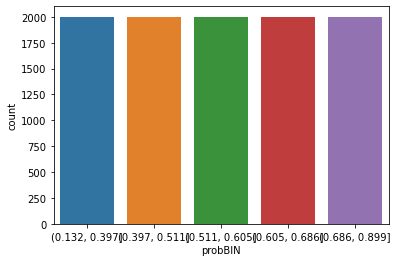

In [164]:
import seaborn as sns

#sns.set_theme(style="whitegrid")

ax = sns.countplot(x="probBIN", data=df)

In [167]:
df.dtypes

HALF                   int64
DOWN                 float64
YARDSTOGO              int64
SCOREDIFF              int64
TIMELEFT               int64
DOWN_STRING          float64
RUN_PASS              object
CONCEPT_8              int64
CONCEPT_9              int64
YARDLINE             float64
YARDSGAINED_Mean     float64
AVG_OVER_TOGO        float64
prob_FIRST_YES       float64
TARGET                object
probBIN             category
dtype: object

In [190]:
df_numeric = df.select_dtypes(include=[np.number])

In [191]:
df_numeric

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST_YES
0,0,0,5,0,480,35,2,0,6.360000,1.272000,0.437594
1,0,0,9,-7,1050,45,5,4,4.756098,0.528455,0.560704
2,0,2,4,7,600,5,4,9,8.164835,2.041209,0.608032
3,0,0,11,7,180,45,4,1,6.216667,0.565152,0.323197
4,0,0,1,0,60,45,8,5,13.416667,13.416667,0.391505
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,5,0,30,35,1,9,6.430769,1.286154,0.467382
9996,0,2,11,-7,1200,35,8,5,13.416667,1.219697,0.294593
9997,0,2,4,0,1050,25,3,3,6.005976,1.501494,0.612723
9998,0,2,2,7,900,5,4,9,8.164835,4.082418,0.603927


In [192]:
df_target = df.TARGET

In [193]:
df_target

0       N
1       Y
2       Y
3       N
4       N
       ..
9995    N
9996    N
9997    Y
9998    Y
9999    Y
Name: TARGET, Length: 10000, dtype: object

In [172]:
df_numeric.columns

Index(['HALF', 'DOWN', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWN_STRING',
       'CONCEPT_8', 'CONCEPT_9', 'YARDLINE', 'YARDSGAINED_Mean',
       'AVG_OVER_TOGO', 'prob_FIRST_YES', 'probBIN'],
      dtype='object')

In [194]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = df_numeric.values
y = df['TARGET'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,stratify=y, random_state=121)


In [195]:
len(train_X)

7000

In [196]:
test_y

array(['N', 'N', 'N', ..., 'Y', 'Y', 'N'], dtype=object)

In [202]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_X)
scaler

X_scaled = scaler.transform(train_X)

In [205]:
from sklearn.linear_model import LogisticRegression

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# instantiate the model (using the default parameters)
logit = LogisticRegression()

# fit the model with data
model = logit.fit(X_scaled,train_y)

In [207]:
model.score(test_X, test_y)

0.624